In [1]:
import matplotlib.pyplot as plt
from plots_data import Plot_Data
from get_data import Data

from utils.json_utils import get_json
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from utils.cchc_preprocess import download_excel_to_df,preprocess_iCE,preprocess_ventas_santiago
from utils.download_data import download_dfs

In [184]:
args_mensual=  {
        "series":["F034.CVS.FLU.INE.Z.0.M"
            

                  ],
        "nombres" : [
                     "Permisos de construccion para vivienda (m2)"],
        "desde": "2010-01-01"  
    }


data=Data()
data.get_data_from_args(args_mensual)
data.download_data(format="excel")


Data downloaded


In [168]:

args_mensual=  {
        "series":["F022.VIV.TIP.MA03.UF.Z.M",
                  "F034.CST.FLU.INE.Z.0.M",
                  "F032.IMC.IND.Z.Z.EP18.Z.Z.0.M",
                  "F034.PCC.IND.CCHC.2014.0.M",
                  "G089.IME.IND.A0.M",
                  "F034.IPVD.FLU.BCCH.2008.0.T"

                  ],
        "nombres" : ["Tasas anuales reajustadas UF",
                     "Permisos de construccion para vivienda (m2)",
                     "IMACEC",
                     "IMACON",
                     "IMCE",
                     "IPV DEPTOS"],
        "desde": "2010-01-01"  
    }


data=Data()
df_mensual=data.get_data_from_args(args_mensual)

args_trimestral=  {
        "series":["F034.VVNN.FLU.CCHC.Z.0.T",
                  "F034.EACPH.IND.BCCH.Z.Z.T",
                  "F034.EACEI.IND.BCCH.Z.Z.T",
                  "F034.IPVD.FLU.BCCH.2008.0.T"],
        "nombres" : ["Venta viviendas nuevas",
                     "Percepcion de estándares de aprobación de créditos hipotecarios",
                     "Percepcion de estándares de aprobación de créditos de construccion inmobiliaria",
                     "IPV Departamentos"],
        "desde": "2010-01-01"

        
  
    }

data=Data()
df_trimestral=data.get_data_from_args(args_trimestral)

In [169]:
var

,Materiales,Salarios,Subcontratos,Misceláneos,Índice general
Fecha,,,,,
2011-01-01,3.390688,7.17733,9.32791,5.094936,7.091954
2011-02-01,2.795285,8.707242,9.131398,3.652023,6.95963
2011-03-01,3.211835,9.309479,9.770598,2.177321,7.405787
2011-04-01,3.20274,13.846548,9.156047,4.496613,7.889506
2011-05-01,2.612393,13.528432,9.746334,3.520867,7.909291
...,...,...,...,...,...
2023-11-01,NaN,NaN,NaN,NaN,NaN
2023-12-01,NaN,NaN,NaN,NaN,NaN
2024-01-01,NaN,NaN,NaN,NaN,NaN


c:\Users\ataglem\AppData\Local\anaconda3\envs\LV_project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ataglem\AppData\Local\anaconda3\envs\LV_project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


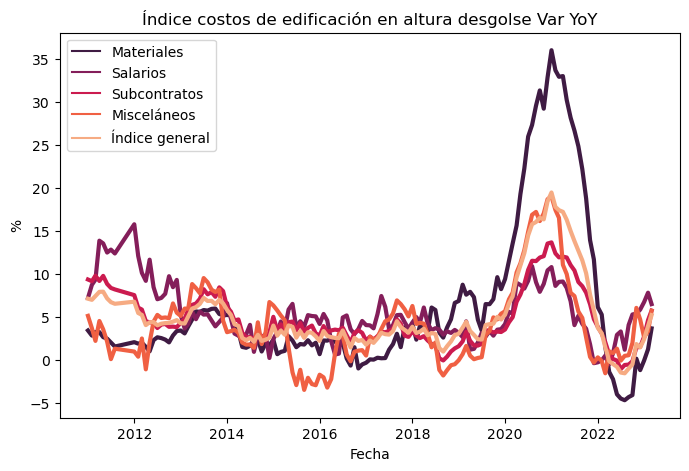

In [152]:
df=download_excel_to_df(url="https://cchc.cl/uploads/indicador/archivos/ICEAltura.xls",filename="ICEAltura")
new_column_mapping={0: 'Year', 1: 'Month',5:"Índice general", 14:"Materiales peso",15:"Salarios peso",16:"Subcontratos peso",17:"Misceláneos peso"}
df=preprocess_iCE(df,new_column_mapping)

df_new=df.loc[:,["Materiales","Salarios","Subcontratos","Misceláneos","Índice general"]]
var=(df_new.shift(-12)-df_new)/df_new*100

### plot ###

fig, ax = plt.subplots(figsize=(8, 5))

ax=sns.lineplot(data=var,dashes=False,palette="rocket",lw=3).set_title(title)
plt.ylabel('%')
plt.show()

In [155]:
var

,Materiales,Salarios,Subcontratos,Misceláneos,Índice general
Fecha,,,,,
2011-01-01,3.390688,7.17733,9.32791,5.094936,7.091954
2011-02-01,2.795285,8.707242,9.131398,3.652023,6.95963
2011-03-01,3.211835,9.309479,9.770598,2.177321,7.405787
2011-04-01,3.20274,13.846548,9.156047,4.496613,7.889506
2011-05-01,2.612393,13.528432,9.746334,3.520867,7.909291
...,...,...,...,...,...
2023-11-01,NaN,NaN,NaN,NaN,NaN
2023-12-01,NaN,NaN,NaN,NaN,NaN
2024-01-01,NaN,NaN,NaN,NaN,NaN


In [170]:
df=pd.merge(df_mensual, df_trimestral, how='outer', left_index=True, right_index=True)
mask = (df.index >= "2010-01-01")
df=df[mask]


In [171]:
df.columns.values

array(['Tasas anuales reajustadas UF',
       'Permisos de construccion para vivienda (m2)', 'IMACEC', 'IMACON',
       'IMCE', 'IPV DEPTOS', 'Venta viviendas nuevas',
       'Percepcion de estándares de aprobación de créditos hipotecarios',
       'Percepcion de estándares de aprobación de créditos de construccion inmobiliaria',
       'IPV Departamentos'], dtype=object)

In [179]:
df_plot=(df["IPV Departamentos"]/(df["IPV Departamentos"].shift(12))-1)*100

<Axes: xlabel='Fecha'>

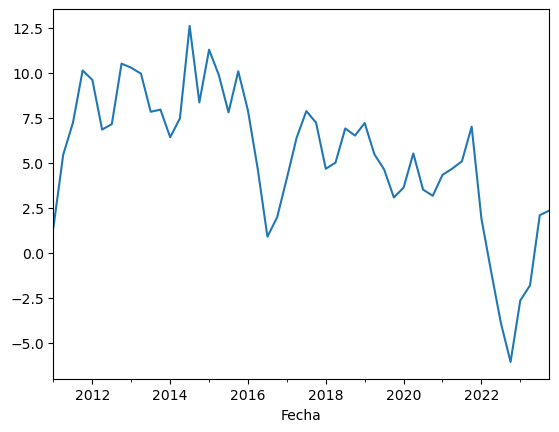

In [181]:
df_plot.dropna().plot()

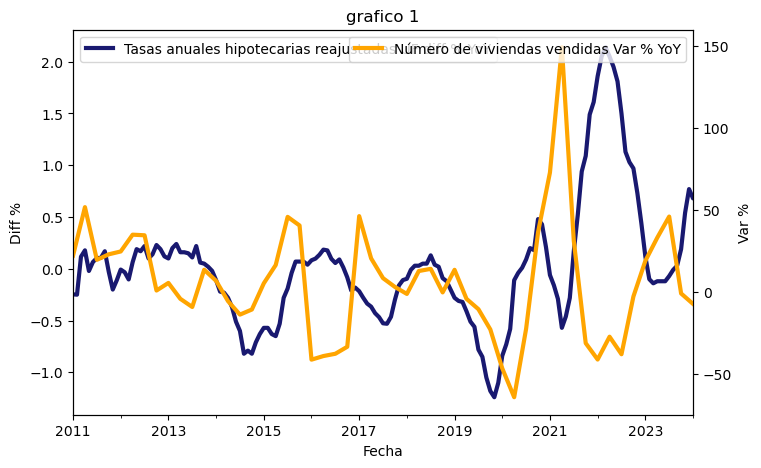

In [121]:
title="grafico 1"

df_plot=pd.DataFrame()
df_plot["Tasas anuales hipotecarias reajustadas UF diff % YoY"]=df['Tasas anuales reajustadas UF'].shift(-12)-df['Tasas anuales reajustadas UF']
df_plot["Tasas anuales hipotecarias reajustadas UF diff % YoY"]=df_plot["Tasas anuales hipotecarias reajustadas UF diff % YoY"].shift(12)

df_plot["Número de viviendas vendidas Var % YoY"]=(df['Viviendas ventas'].shift(-12)-df['Viviendas ventas'])/df['Viviendas ventas']*100
df_plot["Número de viviendas vendidas Var % YoY"]=df_plot["Número de viviendas vendidas Var % YoY"].shift(12)

fig, ax1 = plt.subplots(figsize=(8, 5))
ax2 = ax1.twinx()

ax1.set_ylabel("Diff %")
ax2.set_ylabel("Var %")

df_plot["Tasas anuales hipotecarias reajustadas UF diff % YoY"].dropna().plot(use_index=True,y="Tasas anuales hipotecarias reajustadas UF diff % YoY",ax=ax1,color="midnightblue",lw=3)
df_plot["Número de viviendas vendidas Var % YoY"].dropna().plot(use_index=True,y="Número de viviendas vendidas Var % YoY",title=title,ax=ax2,color="orange",lw=3)

ax1.set_label('IMACON')
ax2.set_label('Ventas casas nuevas')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xlabel('Fecha')
plt.show()

Text(0.5, 0, 'Fecha')

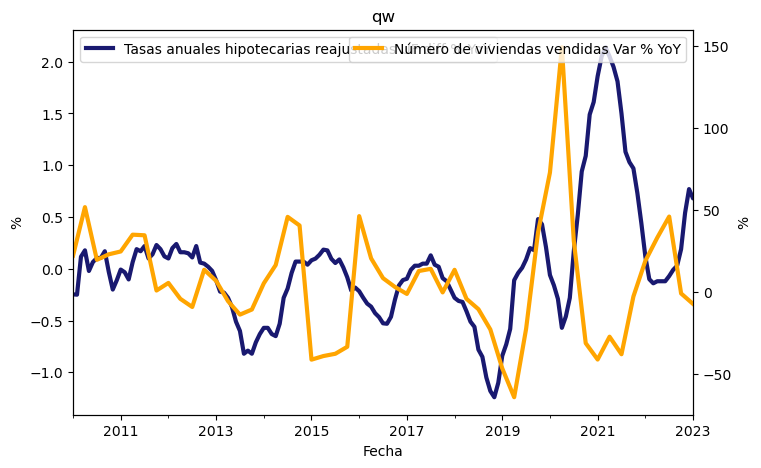

In [54]:
fig, ax1 = plt.subplots(figsize=(8, 5))
title="qw"
ax2 = ax1.twinx()

ax1.set_ylabel("%")
ax2.set_ylabel("%")

df_plot["Tasas anuales hipotecarias reajustadas UF diff % YoY"].plot(use_index=True,y="Tasas anuales hipotecarias reajustadas UF diff % YoY",ax=ax1,color="midnightblue",lw=3)
df_plot["Número de viviendas vendidas Var % YoY"].dropna().plot(use_index=True,y="Número de viviendas vendidas Var % YoY",title=title,ax=ax2,color="orange",lw=3)

ax1.set_label('IMACON')
ax2.set_label('Ventas casas nuevas')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xlabel('Fecha')

<Axes: xlabel='Fecha'>

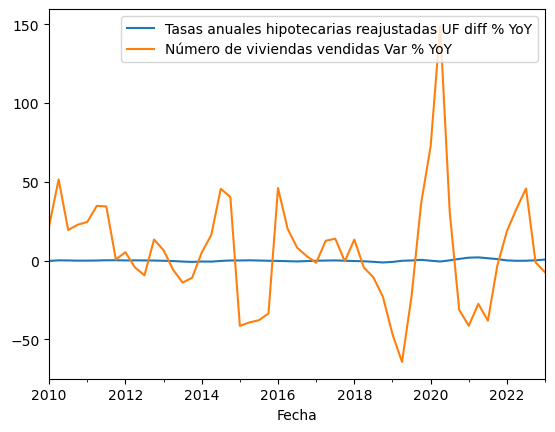

In [51]:
df_plot.dropna().plot()

In [29]:
df.loc[:,["Tasas anuales reajustadas UF",'Viviendas ventas']]

,Tasas anuales reajustadas UF,Viviendas ventas
Fecha,,
2010-01-01,4.583831,4778
2010-02-01,4.602984,NaN
2010-03-01,4.275586,NaN
2010-04-01,4.127528,5098
2010-05-01,4.180988,NaN
...,...,...
2023-12-01,5.210000,NaN
2024-01-01,5.000000,4853
2024-02-01,4.970000,NaN


In [ ]:
##################################
###  1 ###
##################################
title="ver"


df.plot(title=title, color=["midnightblue", "orange", "powderblue"], lw=3)
plt.xlabel("Fecha")
plt.ylabel("Índice")
plt.savefig(os.path.join("plots",title))
plt.close()

In [7]:
from xbrl.instance import parse_xbrl
from xbrl.cache import HttpCache
import logging
logging.basicConfig(level=logging.INFO)
cache: HttpCache = HttpCache('./../cache/')
# cache.set_headers({'From': '', 'User-Agent': 'py-xbrl/1.1.4'})

# parse from path
instance_path = '92434000_202312_C.xbrl'
inst1 = parse_xbrl(instance_path, cache,"https://www.cmfchile.cl/cl/fr/ci/2024-01-02/cl-ci_shell_2024-01-02.xsd")
print(inst1)

RetryError: HTTPSConnectionPool(host='www.cmfchile.cl', port=443): Max retries exceeded with url: /cl/fr/ci/2024-01-02/92434000_202312_C_shell.xsd (Caused by ResponseError('too many 403 error responses'))

In [1]:
from xbrl import XBRLParser, GAAP, GAAPSerializer


In [2]:
xbrl_parser = XBRLParser()
xbrl = xbrl_parser.parse(open("92434000_202312_C.xbrl"))

c:\Users\ataglem\AppData\Local\anaconda3\envs\LV_project\Lib\site-packages\xbrl\xbrl.py:26: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup(fh, "lxml")


In [11]:
gaap_obj = xbrl_parser.parseGAAP(xbrl, doc_date="20211228", context="current", ignore_errors=0)


In [12]:
serializer = GAAPSerializer()
result = serializer.dump(gaap_obj)

In [13]:
print(result) 


{'assets': 0.0, 'current_assets': 0.0, 'non_current_assets': 0.0, 'liabilities_and_equity': 0.0, 'liabilities': 0.0, 'current_liabilities': 0.0, 'noncurrent_liabilities': 0.0, 'commitments_and_contingencies': 0.0, 'redeemable_noncontrolling_interest': 0.0, 'temporary_equity': 0.0, 'equity': 0.0, 'equity_attributable_interest': 0.0, 'equity_attributable_parent': 0.0, 'stockholders_equity': 0.0, 'revenue': 0.0, 'cost_of_revenue': 0.0, 'gross_profit': 0.0, 'operating_expenses': 0.0, 'costs_and_expenses': 0.0, 'other_operating_income': 0.0, 'operating_income_loss': 0.0, 'nonoperating_income_loss': 0.0, 'interest_and_debt_expense': 0.0, 'income_before_equity_investments': 0.0, 'income_from_equity_investments': 0.0, 'income_tax_expense_benefit': 0.0, 'extraordary_items_gain_loss': 0.0, 'income_loss': 0.0, 'net_income_shareholders': 0.0, 'preferred_stock_dividends': 0.0, 'net_income_loss_noncontrolling': 0.0, 'net_income_parent': 0.0, 'net_income_loss': 0.0, 'other_comprehensive_income': 0.0,

In [4]:
dat=Data()
dat.get_data_from_json()
dat.download_data(format="excel")

Data downloaded


In [8]:
df.index=pd.to_datetime(df.index)

In [9]:
df.index

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', length=132, freq=None)

c:\Users\augus\anaconda3\envs\Tareas\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\augus\anaconda3\envs\Tareas\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


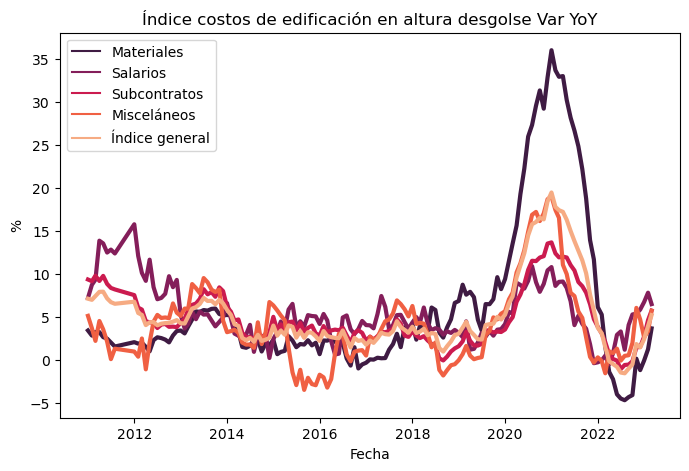

In [11]:
title="Índice costos de edificación en altura desgolse Var YoY"

df=download_excel_to_df(url="https://cchc.cl/uploads/indicador/archivos/ICEAltura.xls",filename="ICEAltura")
new_column_mapping={0: 'Year', 1: 'Month',5:"Índice general", 14:"Materiales peso",15:"Salarios peso",16:"Subcontratos peso",17:"Misceláneos peso"}
df=preprocess_iCE(df,new_column_mapping)

df_new=df.loc[:,["Materiales","Salarios","Subcontratos","Misceláneos","Índice general"]]
df_new.index.name="Fecha"
var=(df_new.shift(-12)-df_new)/df_new*100

### plot ###

fig, ax = plt.subplots(figsize=(8, 5))

ax=sns.lineplot(data=var,dashes=False,palette="rocket",lw=3).set_title(title)
plt.ylabel('%')
plt.show()

c:\Users\augus\anaconda3\envs\Tareas\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\augus\anaconda3\envs\Tareas\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


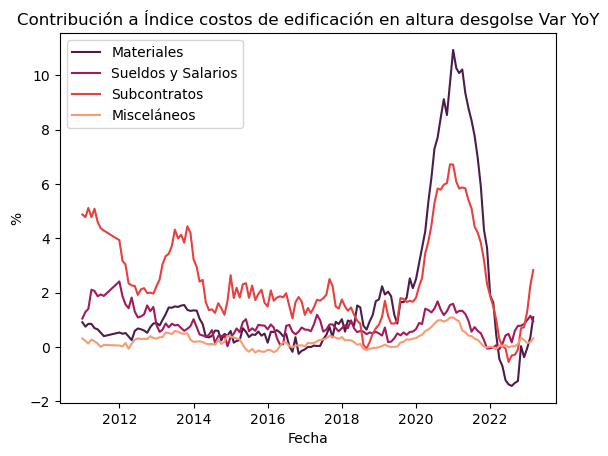

In [12]:
title="Contribución a Índice costos de edificación en altura desgolse Var YoY"

mat=var["Materiales"]*df["Materiales peso"].shift(-12)
sysal=var["Salarios"]*df["Salarios peso"].shift(-12)
subcon=var["Subcontratos"]*df["Subcontratos peso"].shift(-12)
misc=var["Misceláneos"]*df["Misceláneos peso"].shift(-12)

df_combined = pd.concat([mat, sysal, subcon, misc], axis=1)
df_combined=df_combined.dropna()
column_names={0:"Materiales",1:"Sueldos y Salarios",2:"Subcontratos",3:"Misceláneos"}
df_combined.rename(columns=column_names,inplace=True)

### plot ###

sns.lineplot(data=df_combined,palette="rocket",dashes=False).set_title(title)
plt.ylabel('%')
plt.show()

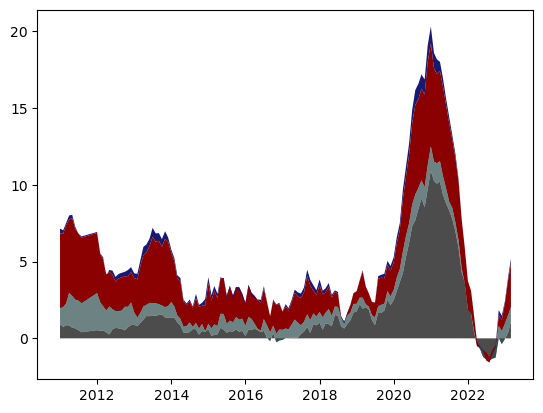

In [26]:
y=df_combined.to_numpy(dtype=float).T
y_stack = np.cumsum(y, axis=0)   # a 3x10 array
x=df_combined.index.to_numpy()
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.fill_between(x, 0, y_stack[0,:], facecolor="black", alpha=.7)
ax1.fill_between(x, y_stack[0,:], y_stack[1,:], facecolor="darkslategrey", alpha=.7)
ax1.fill_between(x, y_stack[1,:], y_stack[2,:], facecolor="darkred")
ax1.fill_between(x, y_stack[2,:], y_stack[3,:], facecolor="midnightblue")

plt.show()

c:\Users\augus\anaconda3\envs\Tareas\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\augus\anaconda3\envs\Tareas\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


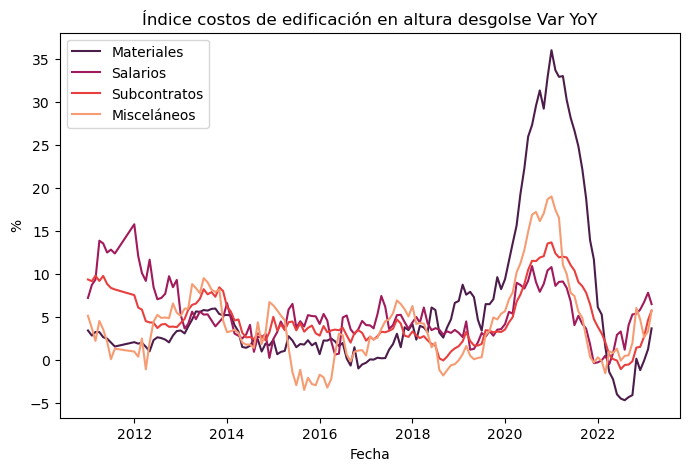

In [19]:
title="Índice costos de edificación en altura desgolse Var YoY"

df=download_excel_to_df(url="https://cchc.cl/uploads/indicador/archivos/ICEAltura.xls",filename="ICEAltura")
df=preprocess_iCE(df)

df_new=df.loc[:,["Materiales","Salarios","Subcontratos","Misceláneos"]]
df_new.index.name="Fecha"
var=(df_new.shift(-12)-df_new)/df_new*100

fig, ax = plt.subplots(figsize=(8, 5))

ax=sns.lineplot(data=var,dashes=False,palette="rocket").set_title(title)
plt.ylabel('%')

plt.show()

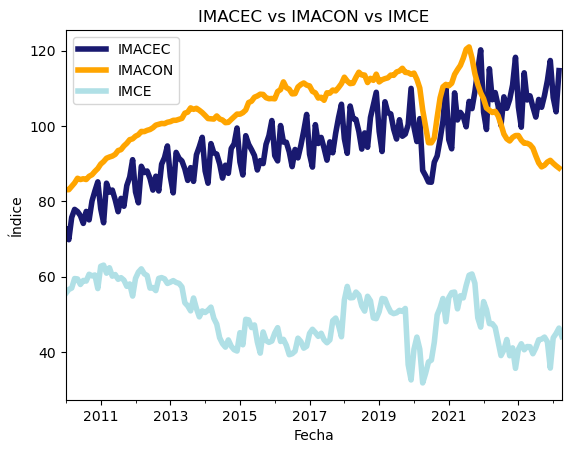

In [6]:
import matplotlib.pyplot as plt
from plots_data import Plot_Data
from utils.json_utils import get_json
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from utils.cchc_preprocess import download_excel_to_df,preprocess_iCE,preprocess_ventas_santiago


######################################
###  IMACEC vs IMACON vs IMCE  #######
######################################

args={
        "series":["F032.IMC.IND.Z.Z.EP18.Z.Z.0.M","F034.PCC.IND.CCHC.2014.0.M","G089.IME.IND.A0.M"],
        "nombres" : ["IMACEC","IMACON","IMCE"],
        "desde":"2010-01-01"
    }

title="IMACEC vs IMACON vs IMCE"

plot=Plot_Data()
df=plot.get_data_plots(args)
### plot ###

df.plot(title=title, color=["midnightblue", "orange", "powderblue"], lw=4)
plt.xlabel("Fecha")
plt.ylabel("Índice")
plt.show()

<Axes: xlabel='Date'>

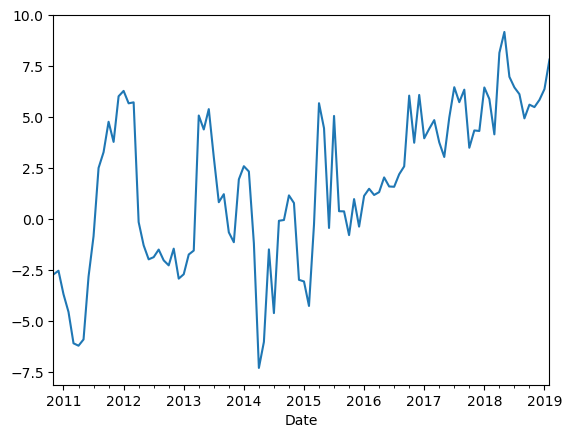

In [102]:
df_new=df["Materiales"]
df_new.index.name="Date"
var=(df_new.shift(-12)-df_new)/df_new*100
data=var#*df["Materiales peso"].shift(-12)
data.iloc[250:350].plot()

In [10]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
import time

In [11]:
Empresa = ['https://www.cmfchile.cl/portal/principal/613/w3-search.php?keywords=falabella#fiscalizados',"//td[text()='90749000']","./following-sibling::td/a"]
keys = ["Url", "selector1", "Selector2"]

In [12]:
año = ["Año" ,2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 20211, 2010, 2009, 2008, 2007, 2006, 2005]
quarter = ["Q4", "Q3", "Q2", "Q1"]
Tipo_Norma = ["Seleccione", "Estandar IFRS", "Norma Chilena"]


#----------Reemplazar valores en la siguiente lista ----------------------------
configurador = [3,1,1]

In [13]:
from selenium import webdriver

class Cmf_scrapper: # dos datos balance y estado resultados
    def __init__(self,browser="edge",driver_path=None):
        self.browser = browser
        self.driver_path = driver_path or self.get_default_driver_path()

    def get_default_driver_path(self):
        drivers = {
            'edge': 'msedgedriver.exe'
        }
        return drivers.get(self.browser, drivers['edge'])
    
    def _init_driver(self):
        if self.browser == "edge":
            absolute_path = os.path.abspath("drivers")
            full_driver_path=os.path.join(absolute_path, self.driver_path)
            self.driver = webdriver.Edge(executable_path=full_driver_path)
        else:
            raise ValueError("Browser not supported")
        return(self.driver)

In [14]:
scrappy=Cmf_scrapper()
driver=scrappy._init_driver()

In [15]:
# Inicializar el navegador web

# Cargar la página de inicio de la empresa en este ejemplo, 
driver.get(Empresa[0])
#time.sleep(2)
td_element = driver.find_element(By.XPATH,Empresa[1])
a_element = td_element.find_element(By.XPATH,Empresa[2])
a_element.click()
#time.sleep(2)


estados_financieros = driver.find_element(By.XPATH, "//*[@id='listado_reportes']/li[3]/a")
estados_financieros.click()
#time.sleep(2)

from selenium.webdriver.support.ui import Select

periodo = driver.find_element(By.ID,'mm')
# Crear un objeto Select a partir del elemento <select>
select_periodo = Select(periodo)
# Obtener todas las opciones del <select> en una lista
base_periodo = select_periodo.options
#-----------------------------------------
año = driver.find_element(By.ID,'aa')
# Crear un objeto Select a partir del elemento <select>
select_año = Select(año)
# Obtener todas las opciones del <select> en una lista
base_año = select_año.options
#--------------------------------------------------------
tipo_norma = driver.find_element(By.NAME,'tipo_norma')
# Crear un objeto Select a partir del elemento <select>
select_tipo_norma = Select(tipo_norma)
# Obtener todas las opciones del <select> en una lista
base_tipo_norma = select_tipo_norma.options

base_año[configurador[0]].click()
base_periodo[configurador[1]].click()
base_tipo_norma[configurador[2]].click()

#time.sleep(2)
consulta = driver.find_element(By.XPATH, '//input[@alt="Consultar"]')
consulta.click()

In [27]:
tabla_eerr = driver.find_element(By.XPATH,"//*[@id='ERF']/table")
filas_eerr =driver.find_elements(By.TAG_NAME, "tr")

encabezados = []
for encabezado in tabla_eerr.find_elements(By.TAG_NAME,'th'):
    encabezados.append(encabezado.text)
datos_eerr = []
for fila in tabla_eerr.find_elements(By.TAG_NAME,'tr'):
    fila_datos_eerr = []
    for celda in fila.find_elements(By.TAG_NAME,'td'):
        fila_datos_eerr.append(celda.text)
    if fila_datos_eerr:
        datos_eerr.append(fila_datos_eerr)
df_eerr = pd.DataFrame(datos_eerr, columns=encabezados)

#Con esto cerramos el dataframe
#driver.close()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id='ERF']/table"}
  (Session info: MicrosoftEdge=125.0.2535.51)


In [12]:
#Ruta donde guardaremos nuestros Excel
ruta = "P:/Control de gestión/Reportes/2022/Flash 2.0/CMF"

In [14]:
tabla_html = """
#<table>
#    ...
#</table>
"""

soup = BeautifulSoup(tabla_html, 'html.parser')
tabla = soup.find('table')
filas = tabla.find_all('tr')
        
tabla = driver.find_element(By.TAG_NAME,'table')

encabezados = []
for encabezado in tabla.find_elements(By.TAG_NAME,'th'):
    encabezados.append(encabezado.text)
datos = []
for fila in tabla.find_elements(By.TAG_NAME,'tr'):
    fila_datos = []
    for celda in fila.find_elements(By.TAG_NAME,'td'):
        fila_datos.append(celda.text)
    if fila_datos:
        datos.append(fila_datos)
df = pd.DataFrame(datos)#, columns=encabezados)

In [15]:
df

,0
0,Fecha de consulta: 22/05/2024 11:51


In [1]:
import os

In [4]:
file="hola"
os.path.join("data", f"{file}.csv")

'data\\hola.csv'

In [5]:
import os
for file in os.listdir("data"):
            if file.endswith(".csv"):
                    print(file)

plot.csv


In [3]:
data=Data()
#data.get_data()
#data.download_data()

,seriesId,frequencyCode,spanishTitle,englishTitle,firstObservation,lastObservation,updatedAt,createdAt
0,F034.BESAN.IND.BCCH.2020.0.D,DAILY,Región de Antofagasta; Boletas electrónicas em...,Región de Antofagasta; Electronic bills issued...,2020-01-07,2024-04-15,2024-05-06,2024-05-06
1,F034.BESOAN.IND.BCCH.2020.0.D,DAILY,Región de Antofagasta; Boletas electrónicas em...,Región de Antofagasta; Electronic bills issued...,2020-01-01,2024-04-15,2024-05-06,2024-05-06
2,F022.CCPEAN.STO.Z.Z.Z.M,MONTHLY,Número de cuentas corrientes de personas natur...,Number of checking accounts in foreign currenc...,2009-01-01,2024-02-01,2024-05-08,2024-05-08
3,F022.CCPNAN.STO.Z.Z.Z.M,MONTHLY,Número de cuentas corrientes de personas natur...,Number of checking accounts in national curren...,2009-01-01,2024-02-01,2024-05-08,2024-05-08
4,F022.DCM90AN.TAS.Z.Z.Z.M,MONTHLY,Deuda comercial con mora de 90 días o más; Reg...,Commercial debt 90 or more days past due; Regi...,2008-01-01,2024-02-01,2024-05-08,2024-05-08
...,...,...,...,...,...,...,...,...
167,F035.PIB.V12.R.CLP.2018.12.Z.Z.02.0.A,ANNUAL,"PIB Administración pública, Región de Antofaga...","Public administration GDP, Region of Antofagas...",2014-01-01,2023-01-01,2024-04-23,2024-04-23
168,F035.PIB.V12.R.CLP.2018.COM.Z.Z.02.0.A,ANNUAL,"PIB Comercio, Región de Antofagasta, contribuc...","Wholesale and retail trade GDP, Region of Anto...",2014-01-01,2023-01-01,2024-04-23,2024-04-23
169,F035.PIB.V12.R.CLP.2018.RH.Z.Z.02.0.A,ANNUAL,"PIB Restaurantes y hoteles, Región de Antofaga...","Hotels and restaurants GDP, Region of Antofaga...",2014-01-01,2023-01-01,2024-04-23,2024-04-23
170,F035.PIB.V12.R.CLP.2018.Z.Z.Z.02.0.A,ANNUAL,"PIB Región de Antofagasta, contribución porcen...","GDP, Region of Antofagasta, contribution comp...",2014-01-01,2023-01-01,2024-04-23,2024-04-23
